# Introduction to Python object oriented programming

## Motivating example

In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
depth = np.r_[100.0, 234.3, 345.12, 474.1]

In [6]:
porosity, flux = np.random.randn(4), 4.5 * np.random.randn(4)

In [13]:
well1 = {
    "depth": depth,
    "porosity": porosity,
    "n0_flux": flux,
    
    "units" : {
        "depth": "m",
        "porosity": "Ratio",
        "n0_flux": "Arbitrary Units"
    }
}
well2 = {"depth": depth, "porosity": None, "n0_flux": flux}

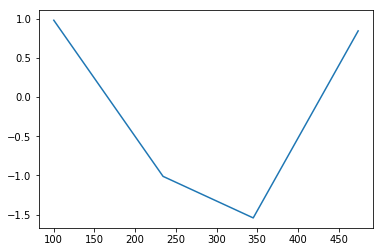

In [9]:
plt.plot(well1["depth"], well1["porosity"])

In [16]:
def plot_well(well, value, symbol="*", **kwargs):
    plt.xlabel("Depth [%s]" % well["units"]["depth"])
    plt.ylabel("%s [%s]" % (value, well["units"][value]))
    plt.plot(well["depth"], well[value], symbol, **kwargs)

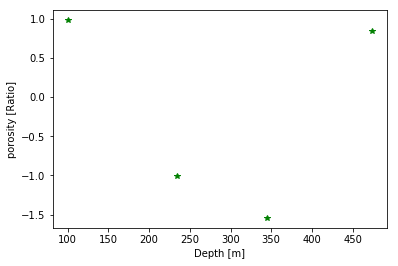

In [17]:
plot_well(well1, "porosity", color="green")

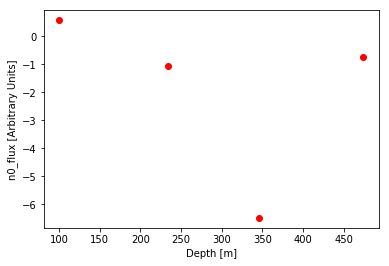

In [19]:
plot_well(well1, "n0_flux", symbol="o", color="red")

In [76]:
class Well(object):
    def __init__(self, depth, coord=None, data=None, id=None):
        self.depth, self.data, self.coord, self.id = depth, data, coord, id
        
        self.units = {
            "depth": "m",
            "porosity": "Ratio",
            "n0_flux": "Arbitrary Units"
        }

    
    def plot(self, value, symbol="*", **kwargs):
        plt.xlabel("Depth [%s]" % self.units["depth"])
        plt.ylabel("%s [%s]" % (value, self.units[value]))
        plt.plot(self.depth, self.data[value], symbol, **kwargs)    
    
    
    def interpolate(self, value, depths):
        return np.interp(depths, self.depth , self.data[value])
    
    def __str__(self):
        return "Well id: %s, at coordinates: %g, %g" \
               % (self.id, self.coord[0], self.coord[1])
    
    
    def __del__(self):
        print("Calling Well.__del__")
    

In [77]:
well = Well(depth, data={"porosity": porosity}, id=102, coord=(302.12, 1006.8))

In [41]:
well.depth.min()

100.0

In [75]:
well.depth.shape, well.data["porosity"].shape

((4,), (4,))

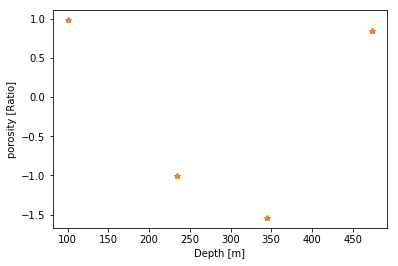

In [38]:
well.plot("porosity")
Well.plot(well, "porosity")

In [80]:
d = np.r_[100.0:400:50j]
poro = well.interpolate("porosity", d)

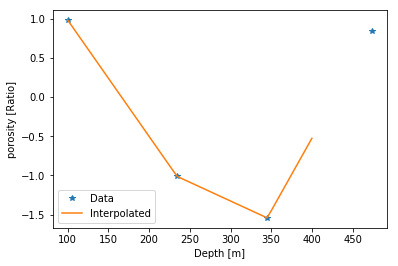

In [84]:
well.plot("porosity", label="Data")
plt.plot(d, poro, label="Interpolated")
plt.legend()

In [68]:
print(well)

Well id: 102, at coordinates: 302.12, 1006.8


In [51]:
str(well)
well.__str__()

'Well object.'

In [60]:
class Proba(object):
    def __init__(self, num):
        self.num = num
    
    def __str__(self):
        return "Number is %d" % self.num

In [61]:
a = Proba(5)

In [62]:
print("a : %s " % a)

a : Number is 5 


In [55]:
print("well: %s" % well)

well: Well object.


In [52]:
num = 5

In [53]:
str(num)

'5'

In [54]:
num.__str__()

'5'

In [44]:
del well

Calling Well.__del__
